<a href="https://colab.research.google.com/github/LudovicaCi/SentimentAnalysis/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/trainingSet.csv')

In [3]:
!pip install nltk

Accuracy MultinomialNB : 0.69 (+/- 0.01)
              precision    recall  f1-score   support

    negative       0.65      0.62      0.64     26412
     neutral       0.61      0.63      0.62     26412
    positive       0.81      0.82      0.81     26412

    accuracy                           0.69     79236
   macro avg       0.69      0.69      0.69     79236
weighted avg       0.69      0.69      0.69     79236

[[16413  7968  2031]
 [ 6770 16726  2916]
 [ 2024  2859 21529]]


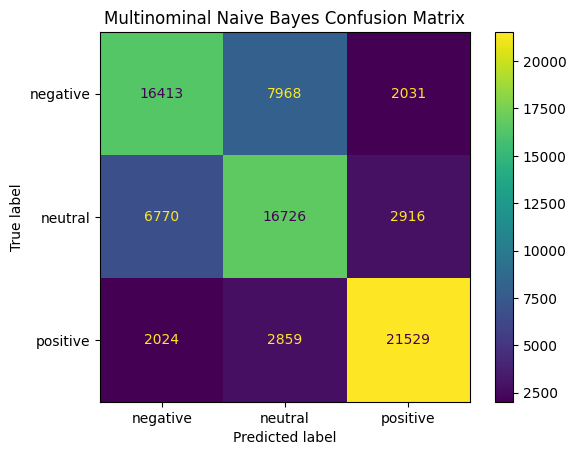

In [27]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Inizializza lo stemmer
stemmer = EnglishStemmer()

# Aggiorna la lista di stopwords in inglese
stop_words = set(stopwords.words('english'))

# Definisci la funzione di analisi personalizzata
def custom_analyzer(doc):
    # Tokenizzazione
    words = word_tokenize(doc)

    # Rimozione delle stop words e stemming
    stemmed_words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]

    return stemmed_words


analyzer = CountVectorizer().build_analyzer()
X = train_df['content'].values  #text
y = train_df['rating'].values  #sentiment
target_names = ['negative', 'neutral', 'positive']

#Pipeline Classifier1
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer=custom_analyzer, max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

#calculating accuracies in cross-valudation
scores = cross_val_score(text_clf, X, y, cv=5)
print("Accuracy MultinomialNB : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf, X, y, cv=5)


print(metrics.classification_report(y, predicted,
                                    target_names=target_names))  # metrics extractions (precision    recall  f1-score   support)
print(metrics.confusion_matrix(y, predicted))
ConfusionMatrixDisplay.from_predictions(y,predicted)
plt.title("Multinominal Naive Bayes Confusion Matrix")
plt.show()

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

Accuracy MultinomialNB : 0.45 (+/- 0.01)
              precision    recall  f1-score   support

    negative       0.43      0.43      0.43     26412
     neutral       0.42      0.39      0.40     26412
    positive       0.48      0.52      0.50     26412

    accuracy                           0.45     79236
   macro avg       0.44      0.45      0.44     79236
weighted avg       0.44      0.45      0.44     79236

[[11335  8047  7030]
 [ 8497 10330  7585]
 [ 6506  6298 13608]]


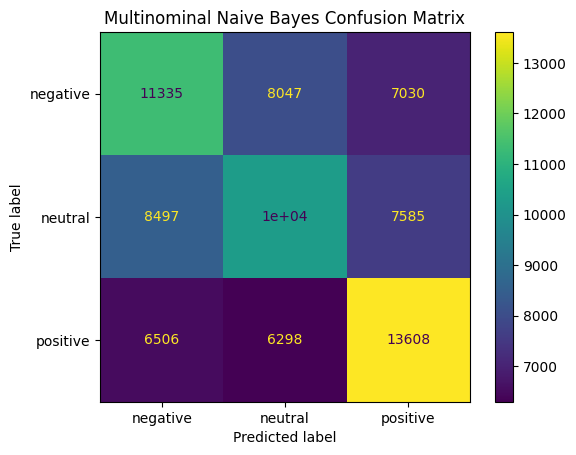

In [23]:
analyzer = CountVectorizer().build_analyzer()
X = train_df['content'].values  #text
y = train_df['rating'].values  #sentiment
target_names = ['negative', 'neutral', 'positive']

#Pipeline Classifier1
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer=preprocess_text, max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

#calculating accuracies in cross-valudation
scores = cross_val_score(text_clf, X, y, cv=5)
print("Accuracy MultinomialNB : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf, X, y, cv=5)


print(metrics.classification_report(y, predicted,
                                    target_names=target_names))  # metrics extractions (precision    recall  f1-score   support)
print(metrics.confusion_matrix(y, predicted))
ConfusionMatrixDisplay.from_predictions(y,predicted)
plt.title("Multinominal Naive Bayes Confusion Matrix")
plt.show()

In [17]:
# Applica la funzione di pre-processamento alla colonna 'content'
train_df['content_processed'] = train_df['content'].apply(preprocess_text)

# Estrai i testi pre-processati
preprocessed_texts = train_df['content_processed'].tolist()

# Ottieni la matrice TF-IDF
tfidf_matrix = tfidf_transform(preprocessed_texts)